<a href="https://colab.research.google.com/github/JChengecha/Air-Quality_Zindi-Trailblazer_Competition-/blob/main/Zindi_Trailblazer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ZINDI TRAILBLAZER**





[LINK](https://zindi.africa/competitions/be-a-trailblazer-kenya)   
In parts of many African cities, air quality seems to be getting worse as more people stay at home. For this challenge we’ll be digging deeper into the data, finding ways to track air quality and how it is changing, even in places without ground-based sensors. This information will be especially useful in the face of the current crisis, since poor air quality makes a respiratory disease like COVID-19 more dangerous.

 
The objective of this challenge is to predict PM2.5 particulate matter concentration in the air every day for each city. PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants. PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure. The data covers the last three months, spanning hundreds of cities across the globe.   
The error metric for this competition is the **Root Mean Squared Error**

#### IMPORT LIBRARIES AND DATASET

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv(r'/content/drive/MyDrive/trailblazer_Zindi/Train.csv')

test = pd.read_csv(r'/content/drive/MyDrive/trailblazer_Zindi/Test.csv')

sample_ = pd.read_csv(r'/content/drive/MyDrive/trailblazer_Zindi/SampleSubmission.csv')

df = train 

In [ ]:
df.sample(3)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
26568,TXXYRS3 X 2020-02-12,2020-02-12,TXXYRS3,82.0,34.0,151.0,5222.11,126,28.800001,94.099998,...,18.028280,-159.465788,38.297633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6767,6SJG8N2 X 2020-02-13,2020-02-13,6SJG8N2,78.0,57.0,91.0,1989.86,72,8.712500,62.512503,...,9.161716,-170.140072,58.633572,1880.154889,3538.972955,0.02709,66.513399,9.735959,-170.210801,58.594612
12787,DPQKOA5 X 2020-02-11,2020-02-11,DPQKOA5,13.0,3.0,64.0,1616.54,158,7.900000,77.000000,...,51.916896,-165.227126,63.800449,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head(3)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CHECK INFO

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

In [ ]:
# column variables in training dataset that are not in testing
col = test.columns.tolist()
col_ = train.columns.tolist()
a = []
for i in col_:
  if i not in col:
    a.append(i)
a

['target', 'target_min', 'target_max', 'target_variance', 'target_count']

#### CLEANING THE DATASET

In [ ]:
# setting column names to lower case
df.columns = df.columns.str.lower()

test.columns = test.columns.str.lower()

#####TRAIN SET

In [ ]:
#check the null values in the TRAIN SET
t = (df.isna().sum() / df.shape[0])*100

t_ =  t[t> 0]
t_

l3_no2_no2_column_number_density           7.163661
l3_no2_no2_slant_column_number_density     7.163661
l3_no2_absorbing_aerosol_index             7.163661
l3_no2_cloud_fraction                      7.163661
l3_no2_sensor_altitude                     7.163661
                                            ...    
l3_ch4_aerosol_optical_depth              81.045260
l3_ch4_sensor_azimuth_angle               81.045260
l3_ch4_sensor_zenith_angle                81.045260
l3_ch4_solar_azimuth_angle                81.045260
l3_ch4_solar_zenith_angle                 81.045260
Length: 68, dtype: float64

In [ ]:
#df.dropna(how = 'any', inplace = True)

In [ ]:
# get all other variables apart from the CH4 variables.
# there are more than 80% of missing data 
#t_ = t_.index.tolist()

#b = ['l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 
#     'l3_ch4_aerosol_height',
#     'l3_ch4_aerosol_optical_depth',
#     'l3_ch4_sensor_azimuth_angle',
#     'l3_ch4_sensor_zenith_angle', 
#     'l3_ch4_solar_azimuth_angle',
#     'l3_ch4_solar_zenith_angle' ]
#a = []
#for i in t_:
#  if i not in b:
#    a.append(i) 

# TRAIN SET
df.drop(['l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 
          'l3_ch4_aerosol_height',
          'l3_ch4_aerosol_optical_depth',
          'l3_ch4_sensor_azimuth_angle',
          'l3_ch4_sensor_zenith_angle', 
          'l3_ch4_solar_azimuth_angle',
          'l3_ch4_solar_zenith_angle'] , axis = 1, inplace = True)

```
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df[a] = imp.fit_transform(df[a])

# mean does not improve the models scores

```



In [ ]:
# Knn imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()

df[df.columns[3:-1]] = imputer.fit_transform(df[df.columns[3:-1]])


In [ ]:
df[['l3_so2_solar_zenith_angle']] = imputer.fit_transform(df[['l3_so2_solar_zenith_angle']])

In [ ]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [ ]:
df.isna().sum()

place_id x date                0
date                           0
place_id                       0
target                         0
target_min                     0
                              ..
l3_so2_cloud_fraction          0
l3_so2_sensor_azimuth_angle    0
l3_so2_sensor_zenith_angle     0
l3_so2_solar_azimuth_angle     0
l3_so2_solar_zenith_angle      0
Length: 75, dtype: int64

In [ ]:
df.shape

(30557, 75)

#####TEST SET

In [ ]:
# TEST SET
l = (test.isna().sum() / df.shape[0])*100

l_ =  t[t>0]
l_

l3_no2_no2_column_number_density           7.163661
l3_no2_no2_slant_column_number_density     7.163661
l3_no2_absorbing_aerosol_index             7.163661
l3_no2_cloud_fraction                      7.163661
l3_no2_sensor_altitude                     7.163661
                                            ...    
l3_ch4_aerosol_optical_depth              81.045260
l3_ch4_sensor_azimuth_angle               81.045260
l3_ch4_sensor_zenith_angle                81.045260
l3_ch4_solar_azimuth_angle                81.045260
l3_ch4_solar_zenith_angle                 81.045260
Length: 68, dtype: float64

In [ ]:
# get all other variables apart from the CH4 variables.
# there are more than 80% of missing data 
#l_ = l_.index.tolist()

#b = ['l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 
#     'l3_ch4_aerosol_height',
 #    'l3_ch4_aerosol_optical_depth',
  #   'l3_ch4_sensor_azimuth_angle',
   #  'l3_ch4_sensor_zenith_angle', 
    # 'l3_ch4_solar_azimuth_angle',
     #'l3_ch4_solar_zenith_angle' ]
#c = []
#for i in l_:
#  if i not in b:
#    c.append(i)

test.drop(['l3_ch4_ch4_column_volume_mixing_ratio_dry_air', 
          'l3_ch4_aerosol_height',
          'l3_ch4_aerosol_optical_depth',
          'l3_ch4_sensor_azimuth_angle',
          'l3_ch4_sensor_zenith_angle', 
          'l3_ch4_solar_azimuth_angle',
          'l3_ch4_solar_zenith_angle'] , axis = 1, inplace = True)



```
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

test[a] = imp.fit_transform(test[a])

# mean does not improve the models scores
```



In [ ]:
# Knn imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()


test[test.columns[3:-1]] = imputer.fit_transform(test[test.columns[3:-1]])

In [ ]:
test[['l3_so2_solar_zenith_angle']] = imputer.fit_transform(test[['l3_so2_solar_zenith_angle']])


In [ ]:
test.isna().sum()[test.isna().sum()>0]

Series([], dtype: int64)

In [ ]:
test.isna().sum()

place_id x date                         0
date                                    0
place_id                                0
precipitable_water_entire_atmosphere    0
relative_humidity_2m_above_ground       0
                                       ..
l3_so2_cloud_fraction                   0
l3_so2_sensor_azimuth_angle             0
l3_so2_sensor_zenith_angle              0
l3_so2_solar_azimuth_angle              0
l3_so2_solar_zenith_angle               0
Length: 70, dtype: int64

In [ ]:
test.shape

(16136, 70)

In [ ]:
df['place_id'].value_counts()

010Q650    94
JSXAVKO    94
I5RGE5G    94
I6718VY    94
I6VIR8R    94
           ..
LKE9VQB    41
S91MBTB    29
6KAHP8X    12
MJSB8K5     7
5IUK9TG     3
Name: place_id, Length: 340, dtype: int64

In [ ]:
test['place_id'].value_counts()

0OS9LVX    94
NJNT1L4    94
MNOX0WS    94
N04QCJO    94
N0O5ZLI    94
           ..
8CPKUI4    35
HYKM9JF    29
DES3SOP    26
RG3VKJB    25
M2NF5RJ    24
Name: place_id, Length: 179, dtype: int64

### EXPLORING THE DATASET

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,30557.0,61.148045,46.861309,1.000000,25.000000,50.000000,80.000000,8.150000e+02
target_min,30557.0,29.025866,33.119775,1.000000,5.000000,15.000000,44.000000,4.380000e+02
target_max,30557.0,117.992234,100.417713,1.000000,60.000000,91.000000,155.000000,9.990000e+02
target_variance,30557.0,7983.756300,48630.902037,0.000000,1064.920000,2395.350000,5882.550000,1.841490e+06
target_count,30557.0,125.831135,146.581856,2.000000,44.000000,72.000000,150.000000,1.552000e+03
...,...,...,...,...,...,...,...,...
l3_so2_cloud_fraction,30557.0,0.196069,0.156214,0.000000,0.060271,0.169331,0.321211,6.181760e-01
l3_so2_sensor_azimuth_angle,30557.0,-8.013651,70.165898,-111.997123,-95.042716,-7.697900,68.763893,8.054407e+01
l3_so2_sensor_zenith_angle,30557.0,34.125342,17.655920,0.000000,20.036625,34.559583,49.007988,6.611129e+01
l3_so2_solar_azimuth_angle,30557.0,-125.652724,66.937415,-179.880630,-165.961748,-156.625253,-111.484985,1.797761e+02


In [ ]:
# NORMALITY TEST USING SHAPIRO - WILK TEST

# TAKE ALL NUMERICAL FEATURES
y = df.iloc[:, 3:]

from scipy.stats import shapiro

for i, item in enumerate(y.columns):
  stat, p = shapiro(df[item])
  print('\nColumn: ',item.upper())
  print('stat = %.3f, p=%.3f\n'%(stat, p))

  if p > 0.05:
    print('GAUSSIAN')
  else:
    print('NOT GAUSSIAN')
    i=+1

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



Column:  TARGET
stat = 0.848, p=0.000

NOT GAUSSIAN

Column:  TARGET_MIN
stat = 0.779, p=0.000

NOT GAUSSIAN

Column:  TARGET_MAX
stat = 0.669, p=0.000

NOT GAUSSIAN

Column:  TARGET_VARIANCE
stat = 0.087, p=0.000

NOT GAUSSIAN

Column:  TARGET_COUNT
stat = 0.656, p=0.000

NOT GAUSSIAN

Column:  PRECIPITABLE_WATER_ENTIRE_ATMOSPHERE
stat = 0.877, p=0.000

NOT GAUSSIAN

Column:  RELATIVE_HUMIDITY_2M_ABOVE_GROUND
stat = 0.949, p=0.000

NOT GAUSSIAN

Column:  SPECIFIC_HUMIDITY_2M_ABOVE_GROUND
stat = 0.890, p=0.000

NOT GAUSSIAN

Column:  TEMPERATURE_2M_ABOVE_GROUND
stat = 0.989, p=0.000

NOT GAUSSIAN

Column:  U_COMPONENT_OF_WIND_10M_ABOVE_GROUND
stat = 0.971, p=0.000

NOT GAUSSIAN

Column:  V_COMPONENT_OF_WIND_10M_ABOVE_GROUND
stat = 0.985, p=0.000

NOT GAUSSIAN

Column:  L3_NO2_NO2_COLUMN_NUMBER_DENSITY
stat = 0.590, p=0.000

NOT GAUSSIAN

Column:  L3_NO2_NO2_SLANT_COLUMN_NUMBER_DENSITY
stat = 0.747, p=0.000

NOT GAUSSIAN

Column:  L3_NO2_ABSORBING_AEROSOL_INDEX
stat = 0.970, p=0.000

N

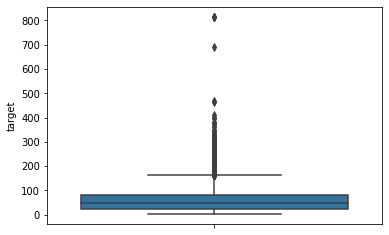

In [ ]:
 sns.boxplot(y=df['target'])

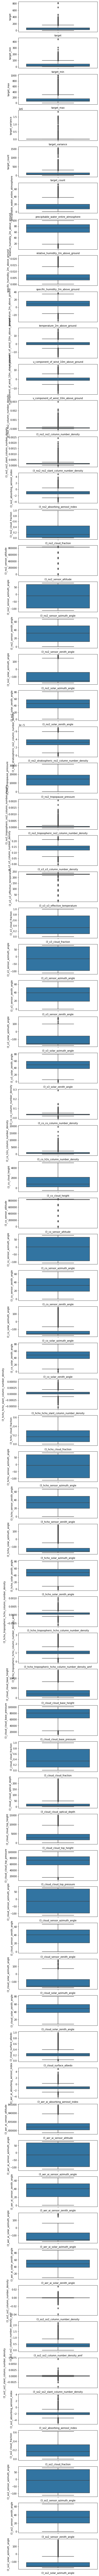

In [ ]:
# Checking for outliers for numeric variables
cols = df.columns[3:-1]

fig, axs = plt.subplots(len(cols), figsize=(6,200))

for i, col_val in enumerate(cols):
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)



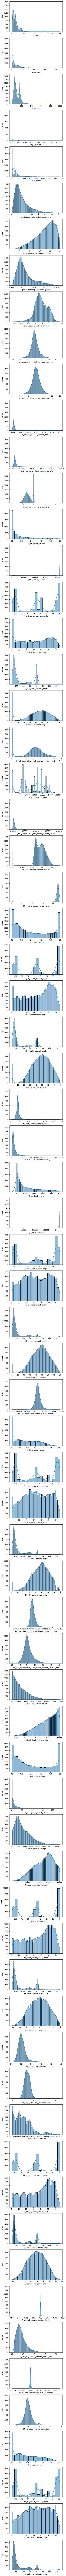

In [ ]:
# Checking for outliers for numeric variables
cols = df.columns[3:-1]

fig, axs = plt.subplots(len(cols), figsize=(6,300), squeeze= True)

for i, col_val in enumerate(cols):
    sns.histplot(data=df, x = col_val,kde=True, ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)


In [ ]:
a = 0
for item in y.columns:
  print('\ncolumn: ', item.upper())
  print(y.corr()[item][(y.corr()[item]>0.5) & (y.corr()[item] < 1) | (y.corr()[item] > -0.5) & (y.corr()[item] < -1)])
  a+=1



column:  TARGET
target_min    0.818803
target_max    0.630801
Name: target, dtype: float64

column:  TARGET_MIN
target    0.818803
Name: target_min, dtype: float64

column:  TARGET_MAX
target             0.630801
target_variance    0.500524
Name: target_max, dtype: float64

column:  TARGET_VARIANCE
target_max    0.500524
Name: target_variance, dtype: float64

column:  TARGET_COUNT
Series([], Name: target_count, dtype: float64)

column:  PRECIPITABLE_WATER_ENTIRE_ATMOSPHERE
specific_humidity_2m_above_ground    0.882341
temperature_2m_above_ground          0.733225
l3_co_h2o_column_number_density      0.729000
Name: precipitable_water_entire_atmosphere, dtype: float64

column:  RELATIVE_HUMIDITY_2M_ABOVE_GROUND
Series([], Name: relative_humidity_2m_above_ground, dtype: float64)

column:  SPECIFIC_HUMIDITY_2M_ABOVE_GROUND
precipitable_water_entire_atmosphere    0.882341
temperature_2m_above_ground             0.816273
l3_co_h2o_column_number_density         0.731416
Name: specific_humidi

In [ ]:
df.columns

Index(['place_id x date', 'date', 'place_id', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'l3_no2_no2_column_number_density',
       'l3_no2_no2_slant_column_number_density',
       'l3_no2_absorbing_aerosol_index', 'l3_no2_cloud_fraction',
       'l3_no2_sensor_altitude', 'l3_no2_sensor_azimuth_angle',
       'l3_no2_sensor_zenith_angle', 'l3_no2_solar_azimuth_angle',
       'l3_no2_solar_zenith_angle',
       'l3_no2_stratospheric_no2_column_number_density',
       'l3_no2_tropopause_pressure',
       'l3_no2_tropospheric_no2_column_number_density',
       'l3_o3_o3_column_number_density', 'l3_o3_o3_effective_temperature',
       'l3_o3_cloud_fraction', 'l3_o3_sensor_azimuth_angle',
   

## feature engineering

In [ ]:
# ENGINEERING THE DATE VARIABLE
# training dataset
df['date'] =  pd.to_datetime(df['date'], format = "%Y-%m-%d")

df['year'] =  df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# ==============================================================================
# testing dataset
test['date'] = pd.to_datetime(test['date'],format = '%Y-%m-%d')

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

In [ ]:
#from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#df['place_id'] = le.fit_transform(df['place_id'])

In [ ]:
t = []
for i in df.place_id.unique():
  if i not in test.place_id.unique():
    t.append(i) 

len(t)

340

In [ ]:
df.shape, test.shape

((30557, 78), (16136, 73))

#### REMOVING MULTICOLIEARLITY

training dataset

In [ ]:
X_ = df.drop(['place_id x date', 'date', 'place_id','target', 'target_min',
             'target_max', 'target_variance', 'target_count'], axis = 1)

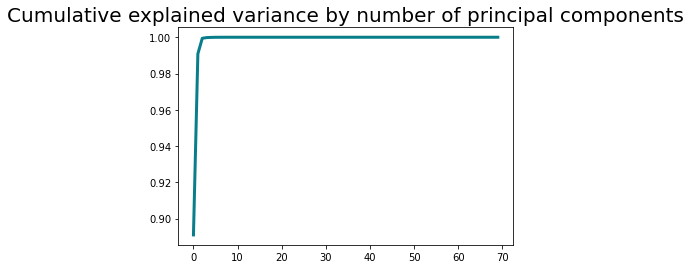

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_.columns) + 1)],
    index=X_.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
precipitable_water_entire_atmosphere,0.465914,0.300861,0.270187,-5.919650,0.109798,-2.284534,1.392024,5.076817,-0.713917,-0.028829,...,-9.416971e-08,-3.018712e-09,-4.804695e-11,-3.679593e-11,3.493956e-11,-6.501726e-12,3.355127e-13,4.272955e-12,8.733139e-14,-0.000000e+00
relative_humidity_2m_above_ground,-0.178297,-0.826062,-1.820376,2.647883,0.915032,-2.731133,0.555643,2.757421,0.437946,0.129740,...,-6.703986e-08,-2.922393e-09,2.391505e-10,2.472664e-11,-1.454964e-11,-3.021645e-13,-6.083685e-13,-1.000217e-12,-1.330182e-13,-4.410287e-34
specific_humidity_2m_above_ground,-0.000005,0.000135,-0.000028,-0.002410,0.000036,-0.000578,0.000367,0.001688,-0.000286,-0.000054,...,9.366849e-04,3.649553e-05,-7.981600e-07,-3.432060e-07,9.006728e-08,3.369997e-09,1.091397e-08,2.454343e-08,3.363265e-09,1.150010e-29
temperature_2m_above_ground,0.236798,0.467901,0.290523,-6.320071,0.361702,-1.348772,0.332309,2.832999,-0.471637,-0.192328,...,-1.953878e-07,-1.119633e-08,6.154050e-10,9.317116e-12,-2.889044e-11,2.321651e-12,-1.426370e-11,-8.266059e-12,-1.025386e-12,-6.177232e-33
u_component_of_wind_10m_above_ground,-0.045378,0.000815,0.058760,0.658435,0.259159,-0.112117,-0.131728,-0.159763,0.033061,-0.107645,...,9.671457e-09,-1.286263e-09,3.283195e-10,-1.772980e-11,1.272866e-11,1.692126e-11,2.185439e-12,-2.827164e-13,2.915841e-13,2.809663e-33


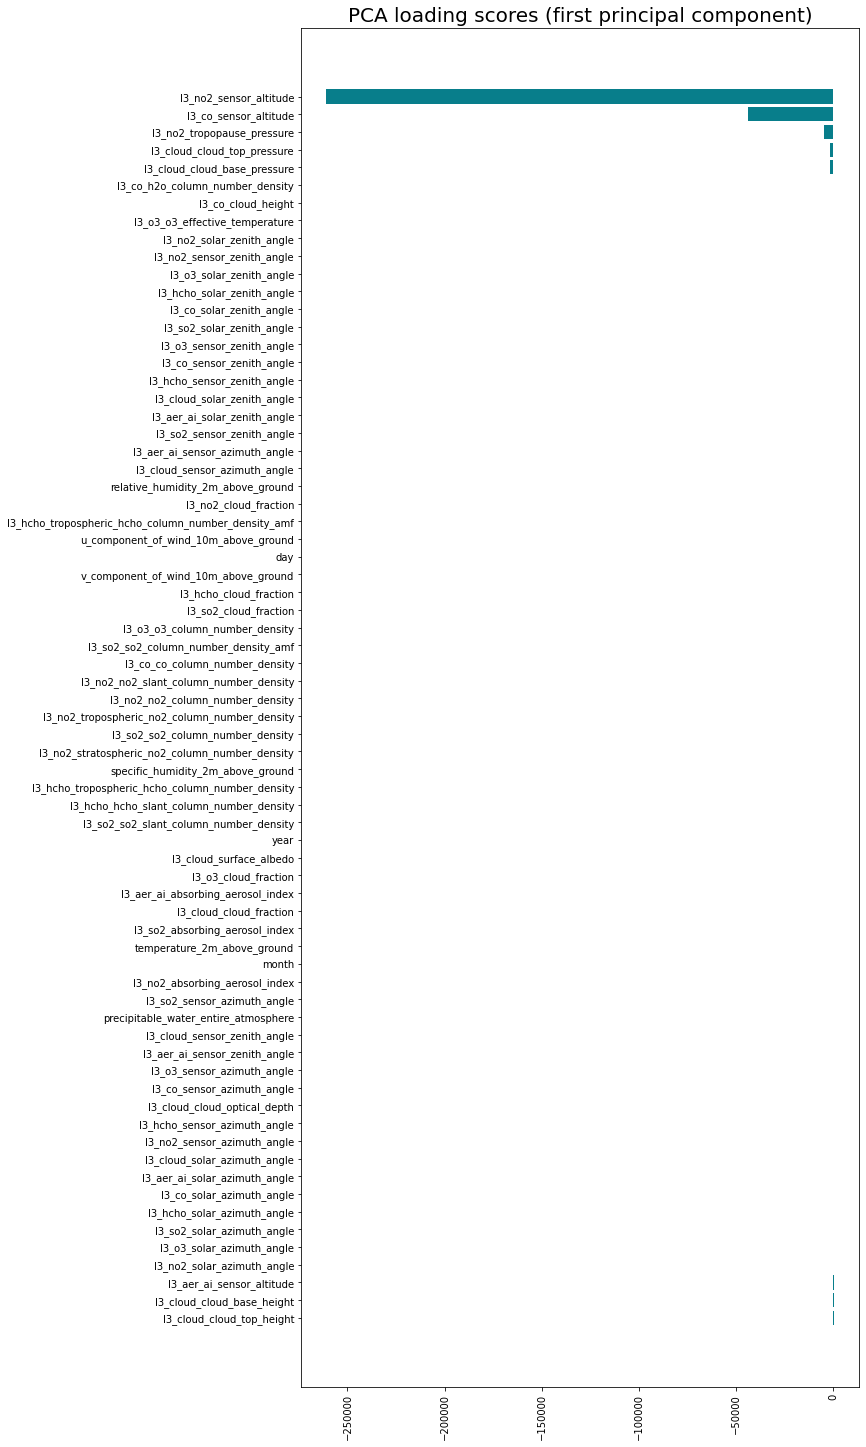

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.figure(figsize=(10, 25))
plt.barh(y=pc1_loadings['Attribute'], width=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pc1_loadings.sort_values(by ='CorrelationWithPC1',ascending  = False)

,Attribute,CorrelationWithPC1
0,l3_cloud_cloud_top_height,194.294060
1,l3_cloud_cloud_base_height,168.244890
2,l3_aer_ai_sensor_altitude,98.505284
3,l3_no2_solar_azimuth_angle,37.998351
4,l3_o3_solar_azimuth_angle,13.931649
...,...,...
65,l3_cloud_cloud_base_pressure,-1563.640224
66,l3_cloud_cloud_top_pressure,-1697.410051
67,l3_no2_tropopause_pressure,-4619.918599
68,l3_co_sensor_altitude,-43929.810122


In [ ]:
'''X = df[['l3_hcho_solar_zenith_angle','l3_co_solar_zenith_angle','l3_o3_solar_zenith_angle',
   'l3_cloud_solar_zenith_angle','l3_aer_ai_solar_zenith_angle','l3_so2_solar_zenith_angle',
   'l3_no2_solar_zenith_angle','l3_no2_tropopause_pressure','l3_o3_o3_column_number_density',
   'temperature_2m_above_ground','specific_humidity_2m_above_ground','precipitable_water_entire_atmosphere']]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

valid_X = test[['l3_hcho_solar_zenith_angle','l3_co_solar_zenith_angle','l3_o3_solar_zenith_angle',
   'l3_cloud_solar_zenith_angle','l3_aer_ai_solar_zenith_angle','l3_so2_solar_zenith_angle',
   'l3_no2_solar_zenith_angle','l3_no2_tropopause_pressure','l3_o3_o3_column_number_density',
   'temperature_2m_above_ground','specific_humidity_2m_above_ground','precipitable_water_entire_atmosphere']]'''

In [ ]:
ff = df[] 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
z = df.drop(['place_id x date', 'date', 'place_id','target', 'target_min',
             'target_max', 'target_variance', 'target_count','year','l3_cloud_cloud_base_pressure',
             'l3_aer_ai_sensor_altitude','l3_cloud_solar_zenith_angle','l3_cloud_sensor_zenith_angle',
             'l3_o3_o3_effective_temperature','l3_cloud_cloud_top_height','l3_co_sensor_altitude',
             'l3_cloud_solar_azimuth_angle','l3_o3_solar_zenith_angle','l3_no2_sensor_altitude',
             'l3_hcho_solar_zenith_angle','l3_aer_ai_solar_zenith_angle','l3_cloud_sensor_azimuth_angle',
             'l3_o3_sensor_zenith_angle','l3_cloud_cloud_top_pressure','l3_cloud_cloud_fraction',
             'l3_co_solar_zenith_angle','l3_so2_sensor_zenith_angle','l3_o3_solar_azimuth_angle',
             'l3_no2_solar_zenith_angle','l3_o3_o3_column_number_density','specific_humidity_2m_above_ground',
             'l3_o3_sensor_azimuth_angle','l3_hcho_tropospheric_hcho_column_number_density','l3_hcho_solar_azimuth_angle',
             'l3_aer_ai_sensor_zenith_angle','l3_so2_solar_zenith_angle'
             ], axis=1)

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif_info['Column'] = z.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
36,28.139107,l3_so2_absorbing_aerosol_index
26,27.377568,l3_hcho_tropospheric_hcho_column_number_densit...
20,25.610421,l3_co_sensor_zenith_angle
6,24.340278,l3_no2_no2_slant_column_number_density
25,24.037697,l3_hcho_sensor_zenith_angle
30,23.802948,l3_aer_ai_absorbing_aerosol_index
1,23.391703,relative_humidity_2m_above_ground
7,23.379045,l3_no2_absorbing_aerosol_index
12,21.159349,l3_no2_stratospheric_no2_column_number_density
32,19.980938,l3_aer_ai_solar_azimuth_angle


In [ ]:
# set the variales for the test datasets 
#test = test[vif_info.Column.values]
#df_ = df[vif_info.Column.values]

In [ ]:
#df[vif_info.Column.values].to_csv("training_set.csv")
#test[vif_info.Column.values].to_csv('testing_set.csv')

#### TESTING FOR HOMOGENEITY

heteroskedasticity 

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X = df[vif_info.Column.values].values
X = df.drop(['place_id x date', 'date','target','place_id', 'target_min',
             'target_max', 'target_variance', 'target_count'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

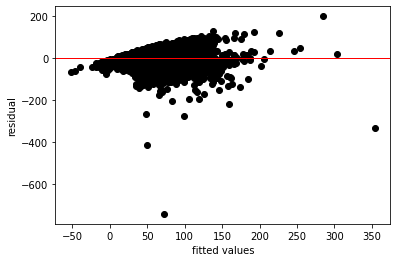

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
the variances are homogeneous!


#### MODEL PREPARATION

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
  
from sklearn.metrics import mean_squared_error

In [ ]:
valid_X = test.drop(['place_id x date', 'date','place_id'], axis = 1)

X.shape, valid_X.shape

((30557, 70), (16136, 70))

In [ ]:
# SCALING THE DATASET TO UNIT NORMAL

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

valid_X = scaler.transform(valid_X)

### MODELLING

#### LINEAR REGRESSION

MultiOutputRegressor method assumes that the outputs are independent of each other, which might not be a correct assumption. Nevertheless, this approach can provide surprisingly effective predictions on a range of problems and may be worth trying, at least as a performance baseline.

In [ ]:
reg = LinearRegression()


reg.fit(X_train, y_train)

# This is our prediction for admission based on our model
lr_ypred = reg.predict(X_test)

np.sqrt(mean_squared_error(y_test, lr_ypred ))


37.433323167699626

In [ ]:
parameters = {'fit_intercept':(True, False), 'normalize':[True, False]}

reg = LinearRegression()

clf = GridSearchCV(estimator = reg, param_grid = parameters, cv = 5, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'fit_intercept': True, 'normalize': False}
0.22467825052855694


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
reg = LinearRegression(fit_intercept = True, normalize = True)


reg.fit(X_train, y_train)

# This is our prediction for admission based on our model
lr_ypred = reg.predict(X_test)

np.sqrt(mean_squared_error(y_test, lr_ypred ))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


26.897140778584998

#### K NEIGHBOURS REGRESSION

In [ ]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

neigh_ypred = neigh.predict(X_test)

np.sqrt(mean_squared_error(y_test, neigh_ypred ))

35.31913150584574

In [ ]:
parameters = {'n_neighbors':(5,7,9,11,13), 'weights':('uniform', 'distance'),
             'algorithm' :('auto', 'ball_tree', 'kd_tree', 'brute') }

neigh = KNeighborsRegressor()

clf = GridSearchCV(estimator = neigh, param_grid = parameters, cv = 5, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.3133844733015218


In [ ]:
neigh = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 13, weights= 'distance')
neigh.fit(X_train, y_train)

neigh_ypred = neigh.predict(X_test)

np.sqrt(mean_squared_error(y_test, neigh_ypred ))

27.743211035214422

#### RANDOM FOREST REGRESSOR

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_ypred = rfr.predict(X_test)

np.sqrt(mean_squared_error(y_test, rfr_ypred ))

32.15219916363549

In [ ]:
parameters = {'n_estimators':(50,100),'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2']}

rfr = RandomForestRegressor()

clf = GridSearchCV(estimator = rfr, param_grid = parameters, cv = 5, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

In [ ]:
rfr = RandomForestRegressor(bootstrap =  True, max_depth = None, max_features = 'log2', n_estimators = 100)
rfr.fit(X_train, y_train)

rfr_ypred = rfr.predict(X_test)

np.sqrt(mean_squared_error(y_test, rfr_ypred ))

32.83267359808663

#### ADA BOOST REGRESSOR

In [ ]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)

abr_ypred = abr.predict(X_test)

np.sqrt(mean_squared_error(y_test,abr_ypred))

47.7079299899424

In [ ]:
parameters = {'n_estimators':(50,100), 'loss':['linear', 'square', 'exponential'],'learning_rate':  [1.0, 0.01, 0.001]}

abr = AdaBoostRegressor()

clf = GridSearchCV(estimator = abr, param_grid = parameters, cv = 5, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)


In [ ]:
abr = AdaBoostRegressor(learning_rate = 0.01, loss = 'linear', n_estimators = 100)
abr.fit(X_train, y_train)

abr_ypred = abr.predict(X_test)

np.sqrt(mean_squared_error(y_test,abr_ypred))

#### GRADIENT BOOSTING REGRESSOR

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

gbr_ypred = gbr.predict(X_test)

np.sqrt(mean_squared_error(y_test,gbr_ypred))

34.45171720648316

In [ ]:
parameters = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'learning_rate':  [1.0, 0.01, 0.001]}

gbr = GradientBoostingRegressor()

clf = GridSearchCV(estimator = gbr, param_grid = parameters, cv = 5, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)

In [ ]:
gbr = GradientBoostingRegressor(learning_rate = 1.0, loss = 'absolute_error')
gbr.fit(X_train, y_train)

gbr_ypred = gbr.predict(X_test)

np.sqrt(mean_squared_error(y_test,gbr_ypred))

29.969058760399754

#### CATBOOST

In [ ]:
# specify the training parameters 
cat = CatBoostRegressor(verbose = 0)
cat.fit(X_train, y_train)

cat_ypred = cat.predict(X_test)

np.sqrt(mean_squared_error(y_test,cat_ypred))

30.02092580804304

In [ ]:
parameters = { 'iterations':[10,50],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No']}

cat = CatBoostRegressor(verbose = 0)

clf = GridSearchCV(estimator = cat, param_grid = parameters, cv = 5,verbose = 0, n_jobs = -1)

clf.fit(X_train, y_train)

print(clf.best_params_)

0:	learn: 45.2061931	total: 30.8ms	remaining: 1.51s
1:	learn: 44.0001070	total: 57.9ms	remaining: 1.39s
2:	learn: 42.9517656	total: 84.2ms	remaining: 1.32s
3:	learn: 42.0619679	total: 111ms	remaining: 1.27s
4:	learn: 41.2404272	total: 138ms	remaining: 1.24s
5:	learn: 40.5119440	total: 163ms	remaining: 1.19s
6:	learn: 39.8998735	total: 190ms	remaining: 1.17s
7:	learn: 39.3537512	total: 215ms	remaining: 1.13s
8:	learn: 38.8349838	total: 248ms	remaining: 1.13s
9:	learn: 38.3507925	total: 279ms	remaining: 1.12s
10:	learn: 37.9667495	total: 305ms	remaining: 1.08s
11:	learn: 37.6216002	total: 332ms	remaining: 1.05s
12:	learn: 37.2931491	total: 358ms	remaining: 1.02s
13:	learn: 37.0206784	total: 383ms	remaining: 985ms
14:	learn: 36.7207289	total: 410ms	remaining: 957ms
15:	learn: 36.4861254	total: 436ms	remaining: 926ms
16:	learn: 36.2044369	total: 478ms	remaining: 928ms
17:	learn: 35.9531529	total: 505ms	remaining: 897ms
18:	learn: 35.7655766	total: 533ms	remaining: 870ms
19:	learn: 35.56435

In [ ]:
# specify the training parameters 
cat = CatBoostRegressor(max_depth =  7, n_estimators =  300, bootstrap_type = 'No', learning_rate = 0.1, verbose = 0)
cat.fit(X_train, y_train)

cat_ypred = cat.predict(X_test)

np.sqrt(mean_squared_error(y_test,cat_ypred))

30.744649939102032

#### NEURAL NETS (TENSORFLOW)

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 

In [ ]:
model = Sequential()

model.add(Dense(70,activation = 'ReLU'))
model.add(Dense(35,activation = 'ReLU'))
model.add(Dense(35,activation = 'ReLU'))
model.add(Dense(16,activation = 'ReLU'))
model.add(Dense(8,activation = 'ReLU'))
model.add(Dense(1,activation = 'ReLU'))

mse = tf.keras.losses.MeanSquaredError()

model.compile(loss = mse,
              optimizer = 'Adam',
              metrics = ["mse"])


In [ ]:
# FITTING THE MODEL
model.fit(x = X_train, y = y_train,epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100
764/764 [==============================] - 3s 3ms/step - loss: 2056.0127 - mse: 2056.0127 - val_loss: 1607.0021 - val_mse: 1607.0021
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 1431.5300 - mse: 1431.5300 - val_loss: 1424.4290 - val_mse: 1424.4290
Epoch 3/100
764/764 [==============================] - 2s 2ms/step - loss: 1345.2456 - mse: 1345.2456 - val_loss: 1443.4380 - val_mse: 1443.4380
Epoch 4/100
764/764 [==============================] - 2s 2ms/step - loss: 1313.1345 - mse: 1313.1345 - val_loss: 1357.5842 - val_mse: 1357.5842
Epoch 5/100
764/764 [==============================] - 2s 2ms/step - loss: 1291.0964 - mse: 1291.0964 - val_loss: 1360.3096 - val_mse: 1360.3096
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 1274.5366 - mse: 1274.5366 - val_loss: 1330.7953 - val_mse: 1330.7953
Epoch 7/100
764/764 [==============================] - 2s 2ms/step - loss: 1264.5948 - mse: 1264.5948 - val_loss: 1498.1328 - val_

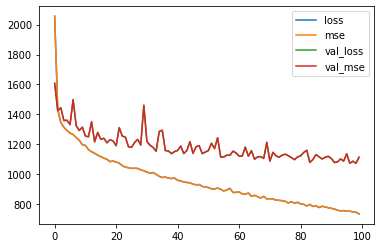

In [ ]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [ ]:
neuro_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,neuro_pred))

33.35708795631783

In [ ]:
model = Sequential()

model.add(Dense(70,activation = 'ReLU'))
model.add(Dense(35,activation = 'ReLU'))
model.add(Dense(35,activation = 'ReLU'))
model.add(Dense(16,activation = 'ReLU'))
model.add(Dense(8,activation = 'ReLU'))
model.add(Dense(1,activation = 'ReLU'))

mse = tf.keras.losses.MeanSquaredError()

model.compile(loss = mse,
              optimizer = 'Adam',
              metrics = ["mse"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop =  EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1, patience = 15)

model.fit(x = X_train, y=y_train,epochs = 100, validation_data = (X_test, y_test), callbacks = early_stop)

Epoch 1/100
764/764 [==============================] - 3s 4ms/step - loss: 2251.2322 - mse: 2251.2322 - val_loss: 1458.3669 - val_mse: 1458.3669
Epoch 2/100
764/764 [==============================] - 2s 2ms/step - loss: 1334.5333 - mse: 1334.5333 - val_loss: 1378.6073 - val_mse: 1378.6073
Epoch 3/100
764/764 [==============================] - 2s 2ms/step - loss: 1288.9821 - mse: 1288.9821 - val_loss: 1355.6285 - val_mse: 1355.6285
Epoch 4/100
764/764 [==============================] - 2s 2ms/step - loss: 1267.6738 - mse: 1267.6738 - val_loss: 1332.5889 - val_mse: 1332.5889
Epoch 5/100
764/764 [==============================] - 2s 2ms/step - loss: 1251.2083 - mse: 1251.2083 - val_loss: 1338.0063 - val_mse: 1338.0063
Epoch 6/100
764/764 [==============================] - 2s 2ms/step - loss: 1235.6152 - mse: 1235.6152 - val_loss: 1309.8230 - val_mse: 1309.8230
Epoch 7/100
764/764 [==============================] - 2s 2ms/step - loss: 1224.7097 - mse: 1224.7097 - val_loss: 1304.7068 - val_

In [ ]:
'''pd.DataFrame(model.history.history).plot()
plt.show()'''

'pd.DataFrame(model.history.history).plot()\nplt.show()'

In [ ]:
neuro_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test,neuro_pred))

33.11475921083446

###Validation

In [ ]:
X.shape, valid_X.shape

((30557, 71), (16136, 71))

In [ ]:
cat = CatBoostRegressor(verbose = 0)
cat.fit(X_train, y_train)

cat_ypred = cat.predict(valid_X)
################################################################################

#rfr = RandomForestRegressor()
#rfr.fit(X_train, y_train)

#rfr_ypred = rfr.predict(test)

In [ ]:
t_ = pd.read_csv(r'/content/drive/MyDrive/trailblazer_Zindi/Test.csv')

In [ ]:
t_ = t_[['Place_ID X Date']]

In [ ]:
t_['target'] = pd.DataFrame(cat_ypred,columns = ['target'])
########################################################
#t_['target'] = pd.DataFrame(rfr_ypred,columns = ['predictions'])


In [ ]:
#pd.merge(vali['place_id x date'], pred, left_index=True, right_index=True).to_csv('submission.csv', index = True)

In [ ]:
t_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Place_ID X Date  16136 non-null  object 
 1   target           16136 non-null  float64
dtypes: float64(1), object(1)
memory usage: 252.2+ KB


In [ ]:
t_.to_csv('submission_.csv',index = False) 